# Data Prepare Friends

This is Preparation of classification Bert modelling

In [1]:
import pandas as pd
import re
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
PATH_DATA = '../data/'

## Data Import

In [3]:
df_dlg = pd.read_csv(PATH_DATA+'friends_all_dialogue_semi_cln.csv')

## Creating Label

Take care of places

In [4]:
place_dlg_cnt = df_dlg.scenes_places.value_counts()
place_dlg_cnt[place_dlg_cnt>200].sort_values(ascending=False).index.tolist()
place_dict = {'[central perk]': 1,
 "[monica and rachel's]":2,
 "[monica and chandler's]":2,
 "[chandler and joey's]":3,
 "[joey and rachel's]":3,
 '[monica]':2,
 "[monica and rachel's apartment]":2,
 "[monica and chandler's apartment]":2,
 "[ross's apartment]":4,
 "[monica's apartment]":2,
 "[joey's apartment]":3,
 '[unknown]':0,
 '[the hallway]':5,
 "[monica and rachel's erm]":2,
 '[a restaurant]':6,
 "[joey and rachel's apartment]":3,
 "[chandler and joey's apartment]":3,
 "[rachel's office]":7,
 '[the hospital]':8,
 '[chandler]':3,
 "[phoebe's apartment]":9,
 "[chandler's office]":10,
 "[ross and rachel's]":4,
 '[a street]':0,
 "[at chandler and joey's]":3,
 '[central perk]]':1,
 '[the delivery room]':8,
 "[at monica and rachel's]":2,
 "[monica's bedroom]":2,
 "[monica and phoebe's]":2,
 "[ross and rachel's apartment]":4,
 "[monica and chandler's bedroom]":2,
 "[rachel's room]":2,
 '[the beach house]':0,
 '[outside central perk]':0,
 '[silvercup studios]':11,
 '[the park]':0,
 "[chandler and joey's erm]":3,
 "[phoebe and rachel's]":9,
 '[barbados]':0,
 "[carol and susan's]":0,
 '[mr]':0,
 '[the theatre]':0,
 '[the semi private labor room]':8,
 "[rachel's bedroom]":2,
 "[i'm surprised that rachel and ross didn't say they weren't either here]]":0,
 "[chandler and monica's]":2,
 "[bloomingdale's]":7,
 "[chandler and monica's apartment]":2,
 '[the hallway between the apartments]':5,
 '[the rest stop]':6,
 '[the restaurant]':6,
 "[monica and chandler's apartment]]":2,
 '[the anniversary party]':0,
 "[phoebe's cab]":0,
 '[monica and chandlers apartment]':2,
 "[monica and rachel's balcony]":2,
 '[later on in the hallway between the apartments]':5,
 '[the roof]':0,
 '[the waiting room]':0,
 '[continued from earlier]':0,
 '[dr]':0,
 '[the airport]':0,
 "[chandler and monica's apartment]]":2,
 '[the moondance diner]':6,
             
 '[the charity event]':0,
 "[joey and janine's]":3,
 "[chandler and eddie's apartment]":3,
 "[rachel's old room]":2,
 '[restaurant]':6,
 "[ross' apartment]":4,
 "[monica's restaurant kitchen]":12,
 '[the reception hall]':0,
 '[the porsche]':0,
 "[joanna's office]":7,
 "[monica and chandler's new apartment]":2,
 '[the movie set]':11,
 "[joey's apartment]]":3,
 "[chandler's apartment]":3,
 '[central park]':1,
 '[the bar]':0,
 "[rachel and joey's apartment]]":3,
 "[chandler and monica's]]":2,
 "[rachel and monica's]":2,
 '[the street in front of central perk]':0,
 '[the recovery room]':8}

In [5]:
df_dlg['label_place'] = df_dlg.scenes_places.apply(lambda x : place_dict[x] if x in list(place_dict.keys()) 
                                                   else 0)
df_dlg['label_place'].value_counts()

2     18980
0     18883
1     10512
3      6812
4      1704
6       991
5       867
8       862
7       673
9       505
10      328
11      278
12       95
Name: label_place, dtype: int64

In [6]:
# place_dlg_cnt = df_dlg[df_dlg.label_place == -1].scenes_places.value_counts()
# place_dlg_cnt[place_dlg_cnt>50].sort_values(ascending=False).index.tolist()

In [7]:
# char_dlg_cnt = df_dlg.character.value_counts()
# char_dlg_cnt[char_dlg_cnt>100].index.tolist()
char = ['rachel', 'ross', 'monica', 'chandler', 'joey', 'phoebe']
char_id = [1,2,3,4,5,6]
char2id = dict(zip(char+['other'],char_id+[0]))

In [8]:
df_dlg['label_str'] = df_dlg.character.apply(lambda x : x if x in char else 'other')
df_dlg['label'] = df_dlg.label_str.apply(lambda x : char2id[x])

In [9]:
df_dlg.head(10)

,eps,dialogue_ids,scenes_places,character,dialogue,dialogue2,dialogue3,label_place,label_str,label
0,0101,0,[central perk],monica,there's nothing to tell! he's just some guy ...,there's nothing to tell! he's just some guy ...,there's nothing to tell he's just some guy i w...,1,monica,3
1,0101,1,[central perk],joey,"c'mon, you're going out with the guy! there'...","c'mon, you're going out with the guy! there'...",c'mon you're going out with the guy there's go...,1,joey,5
2,0101,2,[central perk],chandler,"all right joey, be nice. so does he have a...","all right joey, be nice. so does he have a...",all right joey be nice so does he have a hump ...,1,chandler,4
3,0101,3,[central perk],phoebe,"wait, does he eat chalk? (they all stare, be...","wait, does he eat chalk?",wait does he eat chalk,1,phoebe,6
4,0101,4,[central perk],phoebe,"just, 'cause, i don't want her to go through...","just, 'cause, i don't want her to go through...",just because i don't want her to go through wh...,1,phoebe,6
5,0101,5,[central perk],monica,"okay, everybody relax. this is not even a da...","okay, everybody relax. this is not even a da...",okay everybody relax this is not even a date i...,1,monica,3
6,0101,6,[central perk],chandler,sounds like a date to me. [time lapse],sounds like a date to me.,sounds like a date to me,1,chandler,4
7,0101,7,[central perk],chandler,"alright, so i'm back in high school, i'm sta...","alright, so i'm back in high school, i'm sta...",alright so i'm back in high school i'm standin...,1,chandler,4
8,0101,8,[central perk],all,"oh, yeah. had that dream.","oh, yeah. had that dream.",oh yeah had that dream,1,other,0
9,0101,9,[central perk],chandler,"then i look down, and i realize there's a ph...","then i look down, and i realize there's a ph...",then i look down and i realize there's a phone...,1,chandler,4


In [10]:
df_dlg.label_str.value_counts()

other       10797
rachel       9248
ross         9055
monica       8383
chandler     8355
joey         8176
phoebe       7476
Name: label_str, dtype: int64

In [11]:
# df_dlg[(df_dlg.dialogue3.isnull())]

In [12]:
df_dlg['season']= df_dlg['eps'].apply(lambda x : x[:2])
df_dlg.season.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

In [13]:
df_dlg = df_dlg[~(df_dlg.dialogue3.isnull())]

## Sentence Length

In [14]:
def filt_word1(sent, wordlist):
    use = True
    if len(sent.split(' '))<5:
        for w in wordlist:
            if w in sent:
                use = False
                break
                
    return use

In [15]:
df_dlg.dialogue3 = df_dlg.dialogue3.str.strip()
df_dlg['len_dialogue3'] = df_dlg.dialogue3.str.split().apply(lambda x : len(x))

In [16]:
df_dlg[df_dlg['len_dialogue3']==1].label_str.value_counts()

other       1467
rachel      1273
ross        1150
monica       923
joey         919
chandler     855
phoebe       834
Name: label_str, dtype: int64

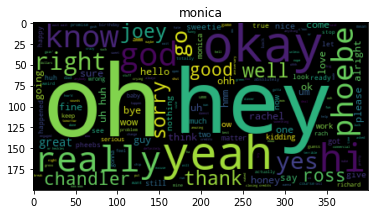

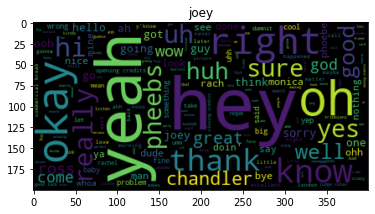

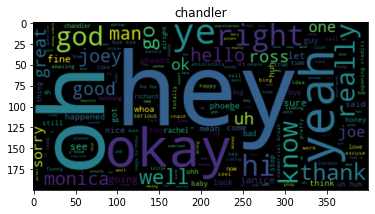

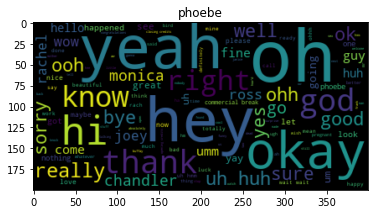

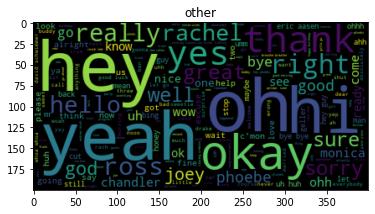

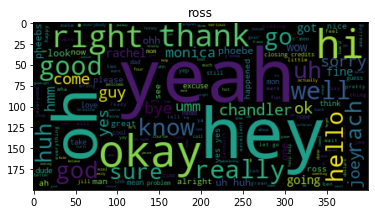

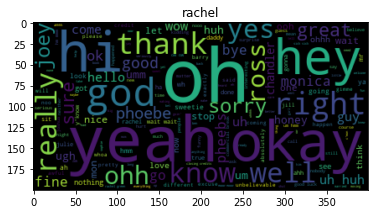

In [17]:

for i in df_dlg.label_str.unique():
    df_dlg0 = df_dlg[df_dlg['season'].isin(['01', '02', '03', '04', '05', '06', '07', '08'])]
    text1 = ' '.join(df_dlg0[(df_dlg0['len_dialogue3']<5)&(df_dlg0.label_str==i)].dialogue2.tolist())
    wordcloud1 = WordCloud().generate(text1)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.title(i)
    plt.show()
    
    

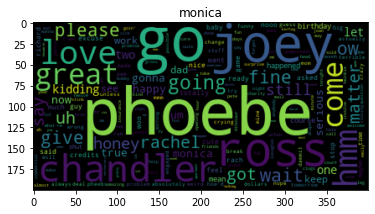

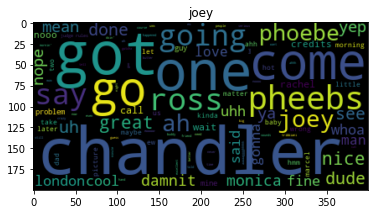

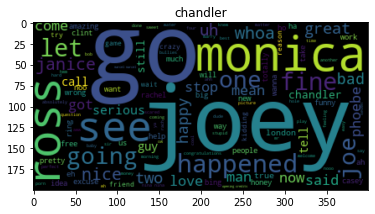

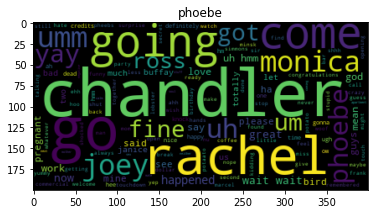

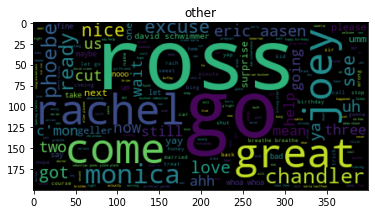

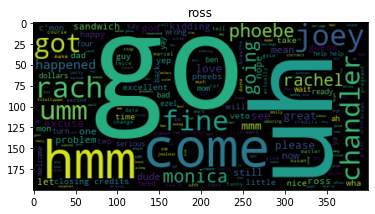

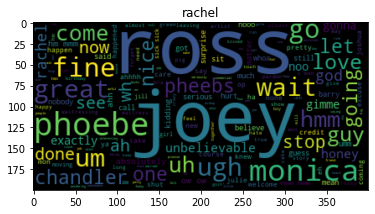

In [18]:
for i in df_dlg.label_str.unique():
    no_use_word1 = ['yeah','okay','hey','hi','oh','really','yes','hello','thanks','sure','ok','huh','wow','bye','thank','know','right','sorry','good','well']
    df_dlg0 = df_dlg[df_dlg['season'].isin(['01', '02', '03', '04', '05', '06', '07', '08'])]
    text1 = ' '.join(df_dlg0[(df_dlg0['len_dialogue3']<5)&(df_dlg0.label_str==i)&(df_dlg0['dialogue3'].apply(lambda x: filt_word1(x,no_use_word1)))].dialogue2.tolist())
    wordcloud1 = WordCloud().generate(text1)
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.title(i)
    plt.show()

In [19]:
## filter first word
no_use_word1 = ['yeah','okay','hey','hi','oh','really','yes','hello','thanks','sure','ok','huh','wow','bye','thank','know','right','sorry','good','well']
df_dlg['filt1'] = ((df_dlg['dialogue3'].apply(lambda x: filt_word1(x,no_use_word1)))).astype(int)
df_dlg2 = df_dlg[df_dlg['filt1']==1]

In [20]:
XX=df_dlg2['len_dialogue3']
XX.describe()

count    50981.000000
mean        11.999980
std         11.015999
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        239.000000
Name: len_dialogue3, dtype: float64

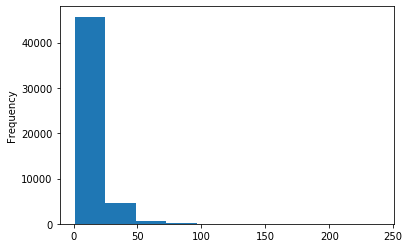

In [21]:
XX.plot(kind='hist')

In [22]:
np.percentile(XX,99)

53.0

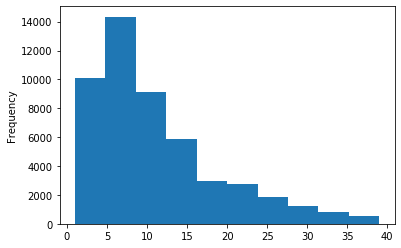

In [23]:
XX[XX<40].plot(kind='hist')

In [24]:
# df_dlg[df_dlg['len_dialogue2']>50]

In [25]:
df_dlg2 = df_dlg2[(df_dlg2['len_dialogue3']>0)&(df_dlg2['len_dialogue3']<50)][['dialogue3','label','eps','season','label_place']]
df_dlg2.columns = ['text','label','episode','season','places']
df_dlg2['ids'] = [i for i in range(len(df_dlg2))]

In [26]:
df_dlg2.head()

,text,label,episode,season,places,ids
0,there's nothing to tell he's just some guy i w...,3,0101,01,1,0
1,c'mon you're going out with the guy there's go...,5,0101,01,1,1
2,all right joey be nice so does he have a hump ...,4,0101,01,1,2
3,wait does he eat chalk,6,0101,01,1,3
4,just because i don't want her to go through wh...,6,0101,01,1,4


In [27]:
df_dlg2.shape

(50344, 6)

## Spliting

In [28]:
df_dlg2_seen=df_dlg2[df_dlg2['season'].isin(['01', '02', '03', '04', '05', '06', '07', '08'])]
train_ids = df_dlg2_seen.sample(int(len(df_dlg2_seen)*0.75),random_state = 167).ids.tolist()
df_dlg2_seen['is_train'] = df_dlg2_seen.ids.isin(train_ids)
df_dlg2_unseen=df_dlg2[df_dlg2['season'].isin(['09', '10'])]

/Users/alamhanz/anaconda/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df_dlg2_seen.head(10)

,text,label,episode,season,places,ids,is_train
0,there's nothing to tell he's just some guy i w...,3,0101,01,1,0,True
1,c'mon you're going out with the guy there's go...,5,0101,01,1,1,False
2,all right joey be nice so does he have a hump ...,4,0101,01,1,2,True
3,wait does he eat chalk,6,0101,01,1,3,False
4,just because i don't want her to go through wh...,6,0101,01,1,4,True
5,okay everybody relax this is not even a date i...,3,0101,01,1,5,True
6,sounds like a date to me,4,0101,01,1,6,True
7,alright so i'm back in high school i'm standin...,4,0101,01,1,7,True
8,oh yeah had that dream,0,0101,01,1,8,True
9,then i look down and i realize there's a phone...,4,0101,01,1,9,False


In [30]:
df_dlg2_unseen.head()

,text,label,episode,season,places,ids
49643,joey,1,0901,09,2,40421
49645,so uh i guess we should make it official huh,1,0901,09,2,40422
49646,uh look rach hey ross is here hey look it's my...,5,0901,09,2,40423
49649,hey and look he brought flowers thanks ross bu...,5,0901,09,2,40424
49650,you're weird today listen i uh wanted to talk ...,2,0901,09,2,40425


## Second Dataset

In [31]:
df_dlg2_seen2 = df_dlg2_seen.copy()
df_dlg2_seen2.rename(columns = {'text':'text2'},inplace = True)
df_dlg2_seen2['text1'] = df_dlg2_seen2.groupby(['episode'])['text2'].shift(1)
df_dlg2_seen2['label_prev'] = df_dlg2_seen2.groupby(['episode'])['label'].shift(1)
df_dlg2_seen2 = df_dlg2_seen2[df_dlg2_seen2['label']!=df_dlg2_seen2['label_prev']] 
df_dlg2_seen2

,text2,label,episode,season,places,ids,is_train,text1,label_prev
0,there's nothing to tell he's just some guy i w...,3,0101,01,1,0,True,NaN,NaN
1,c'mon you're going out with the guy there's go...,5,0101,01,1,1,False,there's nothing to tell he's just some guy i w...,3.0
2,all right joey be nice so does he have a hump ...,4,0101,01,1,2,True,c'mon you're going out with the guy there's go...,5.0
3,wait does he eat chalk,6,0101,01,1,3,False,all right joey be nice so does he have a hump ...,4.0
5,okay everybody relax this is not even a date i...,3,0101,01,1,5,True,just because i don't want her to go through wh...,6.0
...,...,...,...,...,...,...,...,...,...
49635,you don't have to worry about that okay,5,0823,08,8,40415,True,joey honey what would i do without you,1.0
49636,oh hon can you grab me my other box of tissues...,1,0823,08,8,40416,False,you don't have to worry about that okay,5.0
49639,my god,5,0823,08,8,40417,False,oh hon can you grab me my other box of tissues...,1.0
49640,joey,1,0823,08,8,40418,False,my god,5.0


In [32]:
df_dlg2_seen2['label'].value_counts()

0    5415
1    5398
2    5338
3    5194
4    5173
5    4862
6    4319
Name: label, dtype: int64

In [33]:
df_dlg2_unseen2 = df_dlg2_unseen.copy()
df_dlg2_unseen2.rename(columns = {'text':'text2'},inplace = True)
df_dlg2_unseen2['text1'] = df_dlg2_unseen2.groupby(['episode'])['text2'].shift(1)
df_dlg2_unseen2['label_prev'] = df_dlg2_unseen2.groupby(['episode'])['label'].shift(1)
df_dlg2_unseen2 = df_dlg2_unseen2[df_dlg2_unseen2['label']!=df_dlg2_unseen2['label_prev']] 
df_dlg2_unseen2

,text2,label,episode,season,places,ids,text1,label_prev
49643,joey,1,0901,09,2,40421,NaN,NaN
49646,uh look rach hey ross is here hey look it's my...,5,0901,09,2,40423,so uh i guess we should make it official huh,1.0
49650,you're weird today listen i uh wanted to talk ...,2,0901,09,2,40425,hey and look he brought flowers thanks ross bu...,5.0
49651,uh yeah actually i kinda need to talk to you too,1,0901,09,2,40426,you're weird today listen i uh wanted to talk ...,2.0
49652,uh joey can you give us just a minute,2,0901,09,2,40427,uh yeah actually i kinda need to talk to you too,1.0
...,...,...,...,...,...,...,...,...
61484,this is harder than i thought it would be,3,1017-1018,10,2,50339,so i guess this is it,6.0
61485,oh it's gonna be okay,4,1017-1018,10,2,50340,this is harder than i thought it would be,3.0
61486,do you guys have to go to the new house right ...,1,1017-1018,10,2,50341,oh it's gonna be okay,4.0
61487,we got some time,3,1017-1018,10,2,50342,do you guys have to go to the new house right ...,1.0


## Saving

In [34]:
df_dlg2_seen.to_csv('../data/friends_seen_season.csv',index=False)
df_dlg2_unseen.to_csv('../data/friends_unseen_season.csv',index=False)

df_dlg2_seen2.to_csv('../data/friends_seen_season2.csv',index=False)
df_dlg2_unseen2.to_csv('../data/friends_unseen_season2.csv',index=False)